# Introducción a Scikit-Learn

Hay varias bibliotecas de Python que proporcionan implementaciones sólidas de una variedad de algoritmos de aprendizaje automático. Uno de los más conocidos es [Scikit-Learn](http://scikit-learn.org), un paquete que proporciona versiones eficientes de una gran cantidad de algoritmos comunes. Scikit-Learn se caracteriza por una API limpia, uniforme y optimizada, así como por una documentación en línea muy útil y completa. Una ventaja de esta uniformidad es que una vez que se comprende el uso básico y la sintaxis de Scikit-Learn para un tipo de modelo, cambiar a un nuevo modelo o algoritmo es muy sencillo.

### Representación de datos en Scikit-Learn

La mejor manera de pensar acerca de los datos dentro de Scikit-Learn es en términos de tablas de datos.

### Data as table

Una tabla básica es una cuadrícula de datos bidimensional, en la que las filas representan elementos individuales del conjunto de datos, y las columnas representan cantidades relacionadas con cada uno de estos elementos.
En este ejemplo utilizaremos [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famoso conjunto de datos analizado por Ronald Fisher en 1936.
Descargamos en el formato de Pandas ``DataFrame`` usando [seaborn](http://seaborn.pydata.org/):

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Aquí cada fila de los datos se refiere a una sola flor observada, y el número de filas es el número total de flores en el conjunto de datos.
En general, nos referiremos a las filas de la matriz como *muestras*, y al número de filas como `` n_samples``.

Del mismo modo, cada columna de los datos se refiere a una información cuantitativa particular que describe cada muestra.
En general, nos referiremos a las columnas de la matriz como *características*, y al número de columnas como `` n_features``.

#### Matriz de características

Este diseño de tabla deja en claro que la información puede considerarse como una matriz o matriz numérica bidimensional, que llamaremos *matriz de características*.
Por convención, esta matriz de características a menudo se almacena en una variable llamada `` X ``.
Se supone que la matriz de características es bidimensional, con la forma `` [n_samples, n_features] ``, y está contenida con mayor frecuencia en una matriz NumPy o un `` DataFrame `` de Pandas, aunque algunos modelos Scikit-Learn también aceptan SciPy matrices dispersas.

Las muestras (es decir, las filas) siempre se refieren a los objetos individuales descritos por el conjunto de datos.
Por ejemplo, la muestra puede ser una flor, una persona, un documento, una imagen, un archivo de sonido, un video, un objeto astronómico o cualquier otra cosa que pueda describir con un conjunto de medidas cuantitativas.

Las características (es decir, columnas) siempre se refieren a las observaciones distintas que describen cada muestra de manera cuantitativa.
Las características son generalmente de valor real, pero pueden ser booleanas o de valor discreto en algunos casos.

#### Matriz de objetivos (Target)

Además de la matriz de características `` X ``, también trabajamos generalmente con una matriz *label* o *target*, que por convención usualmente llamaremos `` y ``.
La matriz de objetivos es generalmente unidimensional, con longitud `` n_samples``, y generalmente está contenida en una matriz NumPy o Pandas `` Series``.
La matriz de objetivos puede tener valores numéricos continuos o clases / etiquetas discretas.
Si bien algunos estimadores de Scikit-Learn manejan múltiples valores objetivo en forma de una matriz objetivo bidimensional, `` [n_samples, n_targets] ``, trabajaremos principalmente con el caso común de una matriz objetivo unidimensional.

A menudo, un punto de confusión es cómo la matriz de objetivos difiere de las otras columnas de características. La característica distintiva de la matriz de objetivos es que generalmente es la cantidad que queremos *predecir a partir de los datos*: en términos estadísticos, es la variable dependiente.
Por ejemplo, en los datos anteriores podemos desear construir un modelo que pueda predecir la especie de flor en base a las otras mediciones; en este caso, la columna `` especie `` se consideraría la matriz objetivo.

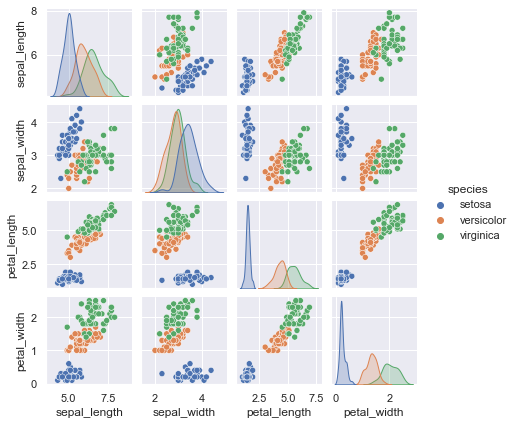

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

Para usar en Scikit-Learn, extraeremos la matriz de características y la columna objetivo del ``DataFrame``, lo que podemos hacer usando algunas de las operaciones de Pandas ``DataFrame``.

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

Para resumir, el diseño esperado de características y valores objetivo se visualiza en el siguiente diagrama:

![](figures/05.02-samples-features.png)

## API Estimador de Scikit-Learn  

La API Scikit-Learn está diseñada con los siguientes principios rectores en mente, tal como se describe en el [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238):

- *Consistencia*: todos los objetos comparten una interfaz común extraída de un conjunto limitado de métodos, con documentación consistente.

- *Inspección*: todos los valores de parámetros especificados se exponen como atributos públicos.

- *Jerarquía de objetos limitada*: solo los algoritmos están representados por clases de Python; los conjuntos de datos están representados
  en formatos estándar (matrices NumPy, `` DataFrame `` de Pandas, matrices dispersas SciPy) y parámetros
  los nombres usan cadenas estándar de Python.

- *Composición*: muchas tareas de aprendizaje automático se pueden expresar como secuencias de algoritmos más fundamentales,
  y Scikit-Learn hace uso de esto siempre que sea posible.

- *Valores predeterminados sensibles*: cuando los modelos requieren parámetros especificados por el usuario, la biblioteca define un valor predeterminado apropiado.

En la práctica, estos principios hacen que Scikit-Learn sea muy fácil de usar, una vez que se entienden los principios básicos.
Todos los algoritmos de aprendizaje automático en Scikit-Learn se implementan a través de la API Estimator, que proporciona una interfaz consistente para una amplia gama de aplicaciones de aprendizaje automático.

### Conceptos básicos de la API

Más comúnmente, los pasos para usar la API del estimador Scikit-Learn son los siguientes:

1. Elija una clase de modelo importando la clase de estimador apropiada de Scikit-Learn.
2. Elija los hiperparámetros del modelo creando instancias de esta clase con los valores deseados.
3. Organice los datos en una matriz de características y un vector objetivo siguiendo la discusión anterior.
4. Ajuste el modelo a sus datos llamando al método `` fit () `` de la instancia del modelo.
5. Aplicar el modelo a nuevos datos:

    - Para el aprendizaje supervisado, a menudo predecimos etiquetas para datos desconocidos utilizando el método `` predict() ``.

    - Para el aprendizaje no supervisado, a menudo transformamos o inferimos propiedades de los datos utilizando el método `` transform () `` o `` predict () ``.

Ahora veremos algunos ejemplos simples de la aplicación de métodos de aprendizaje supervisado y no supervisado.

### Ejemplo de aprendizaje supervisado: regresión lineal simple

Como ejemplo de este proceso, consideremos una regresión lineal simple, es decir, el caso común de ajustar una línea a datos $ (x, y) $ .
Utilizaremos los siguientes datos simples para nuestro ejemplo de regresión:

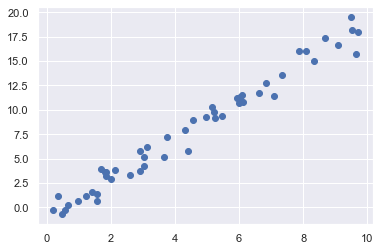

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#### 1. Elija una clase de modelo

En Scikit-Learn, cada clase de modelo está representada por una clase Python.
Entonces, por ejemplo, si quisiéramos calcular un modelo de regresión lineal simple, podemos importar la clase de regresión lineal:

In [6]:
from sklearn.linear_model import LinearRegression

#### 2. Elija hiperparámetros para el modelo

Un punto importante es que *una clase de modelo no es lo mismo que una instancia de un modelo*.

Una vez que hayamos decidido nuestra clase de modelo, todavía hay algunas opciones disponibles para nosotros.
Dependiendo de la clase de modelo con la que estamos trabajando, es posible que necesitemos responder una o más preguntas como las siguientes:

- ¿Nos gustaría ajustar el desplazamiento (es decir, *y* -intercepción)?
- ¿Nos gustaría que el modelo se normalice?
- ¿Nos gustaría preprocesar nuestras funciones para agregar flexibilidad al modelo?
- ¿Qué grado de regularización nos gustaría utilizar en nuestro modelo?
- ¿Cuántos componentes del modelo nos gustaría usar?

Estos son ejemplos de las elecciones importantes que deben hacerse *una vez que se selecciona la clase de modelo*.
Estas opciones a menudo se representan como *hiperparámetros* o parámetros que deben establecerse antes de que el modelo se ajuste a los datos.
En Scikit-Learn, los hiperparámetros se eligen pasando valores en la instanciación del modelo.

Para nuestro ejemplo de regresión lineal, podemos instanciar la clase `` LinearRegression`` y especificar que nos gustaría ajustar la intersección usando el hiperparámetro `` fit_intercept``:

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Tenga en cuenta que cuando se instancia el modelo, la única acción es el almacenamiento de estos valores de hiperparámetro. En particular, aún no hemos aplicado el modelo a ningún dato: la API Scikit-Learn deja muy clara la distinción entre la *elección del modelo* y la *aplicación del modelo* a los datos.

#### 3. Organizar los datos en una matriz de características y un vector objetivo. 

Scikit-Learn requiere una matriz de características bidimensionales y una matriz de destino unidimensional.
Aquí nuestra variable de destino `` y`` ya está en la forma correcta (una matriz de longitud-``n_samples``), pero necesitamos manipular los datos `` x`` para convertirla en una matriz de tamaño `` [n_samples , n_features] ``.
En este caso, esto equivale a una simple remodelación de la matriz unidimensional:

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Ajuste el modelo a sus datos

Ahora es el momento de aplicar nuestro modelo a los datos.
Esto se puede hacer con el método `` fit () `` del modelo:

In [9]:
model.fit(X, y)

LinearRegression()

Este comando `` fit () `` hace que se lleven a cabo varios cálculos internos dependientes del modelo, y los resultados de estos cálculos se almacenan en atributos específicos del modelo que el usuario puede explorar.
En Scikit-Learn, por convención, todos los parámetros del modelo que aprendieron durante el proceso `` fit () `` tienen guiones bajos; Por ejemplo, en este modelo lineal, tenemos lo siguiente:

In [10]:
model.coef_

array([1.9776566])

In [11]:
model.intercept_

-0.9033107255311164

Estos dos parámetros representan la pendiente y la intersección del ajuste lineal simple a los datos.
En comparación con la definición de datos, vemos que están muy cerca de la pendiente de entrada de 2 y la intersección de -1.

Una pregunta que surge con frecuencia se refiere a la incertidumbre en tales parámetros internos del modelo.
En general, Scikit-Learn no proporciona herramientas para sacar conclusiones de los parámetros internos del modelo: la interpretación de los parámetros del modelo es mucho más una pregunta *de modelado estadístico* que una pregunta *de aprendizaje automático*.
El aprendizaje automático se centra más bien en lo que el modelo *predice*.
Si desea profundizar en el significado de los parámetros de ajuste dentro del modelo, hay otras herramientas disponibles, incluido el [paquete Python de Statsmodels](http://statsmodels.sourceforge.net/).

#### 5. Predecir etiquetas para datos desconocidos

Una vez que se entrena el modelo, la tarea principal del aprendizaje automático supervisado es evaluarlo en función de nuevos datos que no formaron parte del conjunto de entrenamiento.
En Scikit-Learn, esto se puede hacer usando el método `` predic () ``.
En este ejemplo, nuestros "nuevos datos" serán una cuadrícula de valores *x*, y preguntaremos qué valores *y* predice el modelo:

In [12]:
xfit = np.linspace(-1, 11)

Como antes, necesitamos estos valores *x* en una matriz de características `` [n_samples, n_features] ``, después podemos alimentar el modelo:

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finalmente, visualicemos los resultados trazando primero los datos sin procesar, y luego el ajuste segun el modelo:

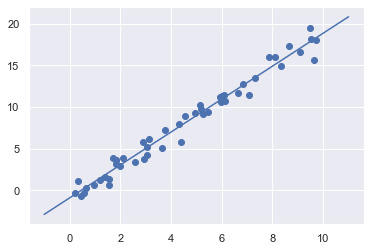

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Típicamente, la eficacia del modelo se evalúa comparando sus resultados con alguna línea base conocida